# Optimizers Empirical experiment
velascoluis@
### Canonical experiments list:
* 1.Simple regressor - Simple DNN - Boston housing price regression dataset
* 2.Image classification - CNN - Fashion-MNIST database of fashion articles
* 3.NLP - Sentence classification - CNN - Reuters newswire topics classification
* 4.Time Series forecasting - RNN

Experiment code is taken from ```tf keras github```

### Optimizers:

* ```Adadelta```
* ```Adagrad```
* ```Adam```
* ```Adamax```
* ```Ftrl```
* ```Nadam```
* ```RMSprop```
* ```SGD``` ( w/o Nesterov and momentum)

### Loss functions:

For regressors ```MAE```, for binary classifiers ```binary cross entropy``` and for multi class classification ```categorical cross entropy```

### Learning rates and optimizer specific parameters:

Default constructor, see documentation ```learning_rate=0.001```

Global parameters:

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print("TF version:" + tf.__version__)
print(tf.config.list_physical_devices('GPU'))

EPOCHS = 50
optimizers_list = [
    tf.keras.optimizers.Adadelta(),
    tf.keras.optimizers.Adagrad(),
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adamax(),
    tf.keras.optimizers.Ftrl(),
    tf.keras.optimizers.Nadam(),
    tf.keras.optimizers.RMSprop(), 
    tf.keras.optimizers.SGD()
]

TF version:2.2.0-rc3
[]


### Experiment 1: Simple DNN - Boston housing price regression dataset

#### Step 1.1: Data preparation

In [0]:
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

#### Step 1.2: Training

In [21]:
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)])
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(train_data, train_labels, epochs=EPOCHS,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 555.8062 - mae: 22.1314 - val_loss: 601.0241 - val_mae: 23.3295
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 566.0838 - mae: 22.1301 - val_loss: 600.9623 - val_mae: 23.3282
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 605.4211 - mae: 22.1288 - val_loss: 600.8991 - val_mae: 23.3269
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 552.4205 - mae: 22.1275 - val_loss: 600.8380 - val_mae: 23.3256
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 595.3339 - mae: 22.1262 - val_loss: 600.7741 - val_mae: 23.3242
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 557.3130 - mae: 22.1249 - val_loss: 600.7122 - val_mae: 23.3229
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 635.7532 - mae: 22.1236 - val_loss: 600.6461 - val_mae: 23.3215
Epoch 8/100
11/11 [=====================

#### Step 1.3: Results

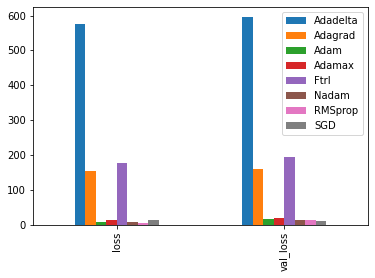

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar()

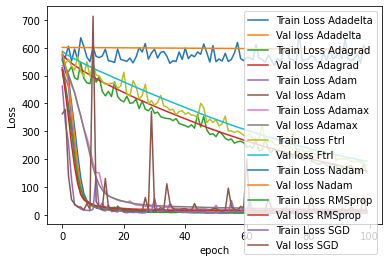

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

### Experiment 2: Image classification - CNN - Fashion-MNIST database of fashion articles

#### Step 2.1: Data preparation

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
(x_train, x_valid) = x_train[100:], x_train[:100] 
(y_train, y_valid) = y_train[100:], y_train[:100]
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### Step 2.2: Training

In [29]:
results = {}
history = {}
for optimizer in optimizers_list:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(x_train,y_train,batch_size=64,epochs=EPOCHS,validation_data=(x_valid, y_valid))
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

Epoch 1/10
936/936 [==============================] - 74s 79ms/step - loss: 2.2913 - accuracy: 0.1219 - val_loss: 2.2723 - val_accuracy: 0.1600
Epoch 2/10
936/936 [==============================] - 71s 76ms/step - loss: 2.2514 - accuracy: 0.1715 - val_loss: 2.2424 - val_accuracy: 0.3100
Epoch 3/10
936/936 [==============================] - 70s 75ms/step - loss: 2.2128 - accuracy: 0.2137 - val_loss: 2.2053 - val_accuracy: 0.3600
Epoch 4/10
936/936 [==============================] - 71s 75ms/step - loss: 2.1626 - accuracy: 0.2659 - val_loss: 2.1579 - val_accuracy: 0.3900
Epoch 5/10
936/936 [==============================] - 70s 75ms/step - loss: 2.1049 - accuracy: 0.3081 - val_loss: 2.0970 - val_accuracy: 0.4500
Epoch 6/10
936/936 [==============================] - 70s 75ms/step - loss: 2.0374 - accuracy: 0.3435 - val_loss: 2.0224 - val_accuracy: 0.5000
Epoch 7/10
936/936 [==============================] - 70s 75ms/step - loss: 1.9584 - accuracy: 0.3758 - val_loss: 1.9343 - val_accuracy:

#### Step 2.3: Results

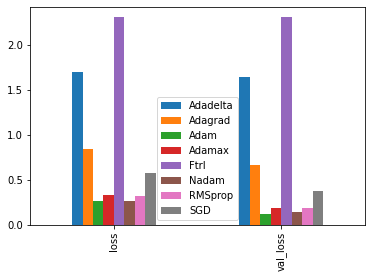

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(results)
df.plot.bar()

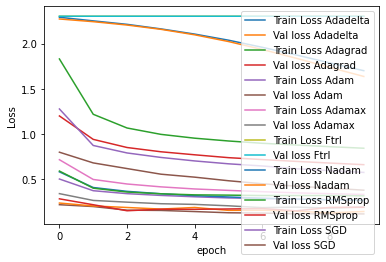

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

### Experiment 3: NLP - Sentence classification - CNN - IMDB Sentiment classification

#### Step 3.1: Data preparation

In [0]:
top_words = 5000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=top_words)
max_words = 500
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_words)


### Step 3.2: Training

In [0]:
history = {}
results = {}
for optimizer in optimizers_list:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(top_words, 32, input_length=max_words))
    model.add(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=128)
    optimizer_key = str(type(optimizer).__name__)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

Epoch 1/10
196/196 [==============================] - 28s 140ms/step - loss: 0.6933 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 2/10
196/196 [==============================] - 27s 140ms/step - loss: 0.6932 - accuracy: 0.5078 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 3/10
196/196 [==============================] - 28s 142ms/step - loss: 0.6932 - accuracy: 0.5092 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 4/10
196/196 [==============================] - 31s 158ms/step - loss: 0.6932 - accuracy: 0.5108 - val_loss: 0.6931 - val_accuracy: 0.5105
Epoch 5/10
196/196 [==============================] - 28s 142ms/step - loss: 0.6931 - accuracy: 0.5086 - val_loss: 0.6930 - val_accuracy: 0.5108
Epoch 6/10
196/196 [==============================] - 29s 146ms/step - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6930 - val_accuracy: 0.5109
Epoch 7/10
196/196 [==============================] - 28s 143ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6930 - val_ac

#### Step 3.3: Results

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(results)
df.plot.bar()

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

### Experiment 4: Time Series forecasting - RNN

#### Step 4.1: Data preparation

In [0]:
import os
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

df = pd.read_csv(csv_path)
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data = uni_data.values
uni_train_mean = uni_data[:30000].mean()
uni_train_std = uni_data[:30000].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std
univariate_past_history = 20
univariate_future_target = 0

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

x_train_uni, y_train_uni = univariate_data(uni_data, 0, 30000,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, 30000, None,
                                       univariate_past_history,
                                       univariate_future_target)

BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

#### Step 4.2: Training

In [0]:
results = {}
EVALUATION_INTERVAL = 200
for optimizer in optimizers_list:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mae',
             optimizer=optimizer,
             metrics=['mae'])
  
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)
    optimizer_key = str(type(optimizer).__name__)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

#### Step 4.3: Results

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(results)
df.plot.bar()

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()